In [ ]:
from model import model
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver


In [ ]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [ ]:
def generate_joke(state: JokeState):
    prompt = f'generate small joke on the topic {state["topic"]}'
    response = model.invoke(prompt)

    return {'joke':response.content}

In [ ]:
def explain_joke(state:JokeState):
    prompt = f'Explain the joke: {state["joke"]} in brief'
    response = model.invoke(prompt)
    return {'explanation':response.content}

In [ ]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('explain_joke', explain_joke)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'explain_joke')
graph.add_edge('explain_joke', END)

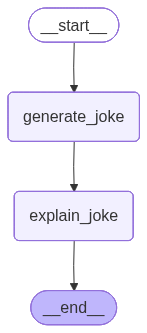

In [ ]:
checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [ ]:
config1 = {'configurable': {'thread_id':'1'}}

In [ ]:
workflow.invoke({'topic':'technology'}, config=config1)

{'topic': 'technology',
 'joke': "Why did the Wi-Fi signal break up with the router?\n\nThey just weren't connecting.",
 'explanation': 'It\'s a pun on the word "connecting."\n\n1.  **Literally:** A Wi-Fi signal and router need to "connect" to function and provide internet.\n2.  **Figuratively:** People in a relationship need to "connect" emotionally to stay together.\n\nThe joke applies the relationship meaning to the technical problem.'}

In [ ]:
#this final state of workflow
workflow.get_state(config1)

StateSnapshot(values={'topic': 'technology', 'joke': "Why did the Wi-Fi signal break up with the router?\n\nThey just weren't connecting.", 'explanation': 'It\'s a pun on the word "connecting."\n\n1.  **Literally:** A Wi-Fi signal and router need to "connect" to function and provide internet.\n2.  **Figuratively:** People in a relationship need to "connect" emotionally to stay together.\n\nThe joke applies the relationship meaning to the technical problem.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-6b4e-68b3-8002-1f7be30af149'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T12:54:52.820497+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-3674-6136-8001-2d0ec31aaa6e'}}, tasks=(), interrupts=())

In [ ]:
#the full histroy
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'technology', 'joke': "Why did the Wi-Fi signal break up with the router?\n\nThey just weren't connecting.", 'explanation': 'It\'s a pun on the word "connecting."\n\n1.  **Literally:** A Wi-Fi signal and router need to "connect" to function and provide internet.\n2.  **Figuratively:** People in a relationship need to "connect" emotionally to stay together.\n\nThe joke applies the relationship meaning to the technical problem.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-6b4e-68b3-8002-1f7be30af149'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T12:54:52.820497+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-3674-6136-8001-2d0ec31aaa6e'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'technology', 'joke': "Why did the Wi-Fi signal break up with the router?\n\nThey just weren't connecting."}, nex

In [ ]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'ai'}, config=config2)

{'topic': 'ai',
 'joke': 'Why did the AI break up with the calculator?\nIt said it needed more emotional processing... and a better algorithm for love.',
 'explanation': 'The joke plays on the contrast between AI\'s logical nature and love\'s emotional complexity:\n\n1.  **AI\'s desire:** The AI, a machine, is seeking "emotional processing," a very human desire, which a calculator (pure numbers) cannot provide.\n2.  **Ironic framing:** It still describes love in technical terms ("better algorithm"), highlighting its machine perspective on something inherently non-algorithmic.\n\nEssentially, the AI is too advanced for the calculator\'s basic logic, but still too much of a machine to understand love in a truly human way.'}

In [ ]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'ai', 'joke': 'Why did the AI break up with the calculator?\nIt said it needed more emotional processing... and a better algorithm for love.', 'explanation': 'The joke plays on the contrast between AI\'s logical nature and love\'s emotional complexity:\n\n1.  **AI\'s desire:** The AI, a machine, is seeking "emotional processing," a very human desire, which a calculator (pure numbers) cannot provide.\n2.  **Ironic framing:** It still describes love in technical terms ("better algorithm"), highlighting its machine perspective on something inherently non-algorithmic.\n\nEssentially, the AI is too advanced for the calculator\'s basic logic, but still too much of a machine to understand love in a truly human way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b40-6994-6810-8002-2403a28344b3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T12:57:33.700712+00:00', parent_config=

In [ ]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'ai', 'joke': 'Why did the AI break up with the calculator?\nIt said it needed more emotional processing... and a better algorithm for love.', 'explanation': 'The joke plays on the contrast between AI\'s logical nature and love\'s emotional complexity:\n\n1.  **AI\'s desire:** The AI, a machine, is seeking "emotional processing," a very human desire, which a calculator (pure numbers) cannot provide.\n2.  **Ironic framing:** It still describes love in technical terms ("better algorithm"), highlighting its machine perspective on something inherently non-algorithmic.\n\nEssentially, the AI is too advanced for the calculator\'s basic logic, but still too much of a machine to understand love in a truly human way.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b40-6994-6810-8002-2403a28344b3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T12:57:33.700712+00:00', parent_config

# Time Travel

In [ ]:
workflow.get_state({"configurable": {"thread_id": "1",'checkpoint_id': '1f0a2b3a-3674-6136-8001-2d0ec31aaa6e'}})

StateSnapshot(values={'topic': 'technology', 'joke': "Why did the Wi-Fi signal break up with the router?\n\nThey just weren't connecting."}, next=('explain_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0a2b3a-3674-6136-8001-2d0ec31aaa6e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-06T12:54:47.277393+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-223a-6bbe-8000-babeea2e540f'}}, tasks=(PregelTask(id='13d0818f-e1ef-dae3-9ef2-a843ce64416e', name='explain_joke', path=('__pregel_pull', 'explain_joke'), error=None, interrupts=(), state=None, result={'explanation': 'It\'s a pun on the word "connecting."\n\n1.  **Literally:** A Wi-Fi signal and router need to "connect" to function and provide internet.\n2.  **Figuratively:** People in a relationship need to "connect" emotionally to stay together.\n\nThe joke applies the relationship meaning to the technical problem.'}),), inter

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'technology', 'joke': 'Why was the computer cold?\n\nBecause it left its Windows open!', 'explanation': 'The joke is a pun on the word "Windows":\n\n1.  **Literal:** Leaving actual windows (in a house) open lets in cold air.\n2.  **Computer:** "Windows" refers to the Microsoft Windows operating system or the application windows on a computer screen.\n\nThe humor comes from pretending the computer literally left its "house windows" open, causing it to feel cold, when it\'s actually referring to its software.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b68-63ec-6d0f-8002-7ef9928f6188'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T13:15:26.849563+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b68-0691-68c6-8001-f8b746ca6d06'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'technology', 'joke': 'Why was

In [ ]:
workflow.invoke(None, {'configurable':{'thread_id':'1', 'checkpoint_id': '1f0a2b3a-223a-6bbe-8000-babeea2e540f'}})

{'topic': 'technology',
 'joke': 'Why was the computer cold?\n\nBecause it left its Windows open!',
 'explanation': 'The joke is a pun on the word "Windows":\n\n1.  **Literal:** Leaving actual windows (in a house) open lets in cold air.\n2.  **Computer:** "Windows" refers to the Microsoft Windows operating system or the application windows on a computer screen.\n\nThe humor comes from pretending the computer literally left its "house windows" open, causing it to feel cold, when it\'s actually referring to its software.'}

# Update State

In [ ]:
# this is the spet of Update state this also store into the history
workflow.update_state({'configurable':{'thread_id':'1', 'checkpoint_id': '1f0a2b3a-223a-6bbe-8000-babeea2e540f',  "checkpoint_ns": ""}}, {"topic":'Harshil'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a2b75-fb61-627a-8001-44f87fda1307'}}

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Harshil'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b75-fb61-627a-8001-44f87fda1307'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-10-06T13:21:31.696805+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b3a-223a-6bbe-8000-babeea2e540f'}}, tasks=(PregelTask(id='6d5b0bbe-30e5-a13c-9eca-723ea5764b12', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'Harshil'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b72-e933-60f4-8001-7fe8ccbfcbfa'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-10-06T13:20:09.259851+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_

In [ ]:
workflow.invoke(None, {'configurable':{'thread_id':'1', 'checkpoint_id': '1f0a2b75-fb61-627a-8001-44f87fda1307'}})

{'topic': 'Harshil',
 'joke': 'Why did Harshil get confused at the "gentle" yoga class?\nBecause everyone expected him to be... well, a little more **harsh**!',
 'explanation': 'The joke is a **pun** on the name "Harshil," which sounds very similar to the word "**harsh**."\n\nThe humor comes from the ironic expectation that someone named "Harshil" would be the opposite of "gentle" in a yoga class, based purely on his name.'}

In [ ]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Harshil', 'joke': 'Why did Harshil get confused at the "gentle" yoga class?\nBecause everyone expected him to be... well, a little more **harsh**!', 'explanation': 'The joke is a **pun** on the name "Harshil," which sounds very similar to the word "**harsh**."\n\nThe humor comes from the ironic expectation that someone named "Harshil" would be the opposite of "gentle" in a yoga class, based purely on his name.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b7a-9443-6b66-8003-d4faf2eef997'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-06T13:23:35.102141+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2b7a-2417-630a-8002-3a78901e197b'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'Harshil', 'joke': 'Why did Harshil get confused at the "gentle" yoga class?\nBecause everyone expected him to be... well, a lit

# Fault Tolerance

In [25]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [26]:

# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [27]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(10)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

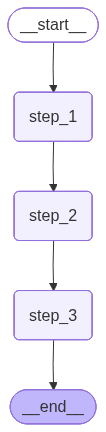

In [33]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)
graph

In [34]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [35]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-834a-6fd1-8001-5ab55332187e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-06T13:54:25.527160+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-8345-66ea-8000-ebb8c34f14b8'}}, tasks=(PregelTask(id='a718b8fb-29e3-cd88-911b-33977f2a3d52', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [36]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-834a-6fd1-8001-5ab55332187e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-06T13:54:25.527160+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-8345-66ea-8000-ebb8c34f14b8'}}, tasks=(PregelTask(id='a718b8fb-29e3-cd88-911b-33977f2a3d52', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-8345-66ea-8000-ebb8c34f14b8'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-10-06T13:54:25.524885+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [37]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [38]:
graph.get_state({"configurable": {"thread_id": 'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bc0-700e-6bb3-8003-60400a07cd83'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-06T13:54:50.353737+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bc0-700c-69bc-8002-9334602fcca1'}}, tasks=(), interrupts=())

In [39]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bc0-700e-6bb3-8003-60400a07cd83'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-10-06T13:54:50.353737+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bc0-700c-69bc-8002-9334602fcca1'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bc0-700c-69bc-8002-9334602fcca1'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-06T13:54:50.352860+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a2bbf-834a-6fd1-8001-5ab55332187e'}}, tasks=(PregelTask(id='09cf443a-91e1-f6b1-c45f-131605eb211